# Support Vector Machine (SVM)

In [23]:
# Importing the libraries

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [24]:
# Importing the dataset

dataset = pd.read_csv('pima-indians-diabetes.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [25]:
# Renaming coloumns with suitable name for better understanding of dataset

dataset.columns = ['PN', 'PGC', 'BP', 'SFT', 'SI', 'BMI' , 'DPF', 'Age', 'Class'] 

In [26]:
# Showing starting rows from dataset as sample

dataset.head()

,PN,PGC,BP,SFT,SI,BMI,DPF,Age,Class
0,1,85,66,29,0,26.6,0.351,31,0
1,8,183,64,0,0,23.3,0.672,32,1
2,1,89,66,23,94,28.1,0.167,21,0
3,0,137,40,35,168,43.1,2.288,33,1
4,5,116,74,0,0,25.6,0.201,30,0


In [27]:
# Checking if any null values are present or not

dataset.isna().sum()

PN       0
PGC      0
BP       0
SFT      0
SI       0
BMI      0
DPF      0
Age      0
Class    0
dtype: int64

In [28]:
# Brief statistical analysis

dataset.describe()

,PN,PGC,BP,SFT,SI,BMI,DPF,Age,Class
count,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000
mean,3.842243,120.859192,69.101695,20.517601,79.903520,31.990482,0.471674,33.219035,0.348110
std,3.370877,31.978468,19.368155,15.954059,115.283105,7.889091,0.331497,11.752296,0.476682
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243500,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,32.000000,32.000000,0.371000,29.000000,0.000000
75%,6.000000,140.000000,80.000000,32.000000,127.500000,36.600000,0.625000,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [29]:
# Features shape
# 767 rows and 8 coloumns
X.shape

(767, 8)

In [30]:
# Label shape
# 767 rows , 1 colomn
y.shape

(767,)

In [31]:
# Splitting the dataset into the Training set and Test set

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [32]:
# Feature Scaling

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [33]:
# Training the SVM model on the Training set

from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0, probability=True)
classifier.fit(X_train, y_train)

SVC(kernel='linear', probability=True, random_state=0)

In [34]:
# Making the Confusion Matrix

from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[120  11]
 [ 26  35]]


0.8072916666666666

In [35]:
print("Model Accuracy:", accuracy_score(y_test, y_pred)*100)

Model Accuracy: 80.72916666666666


In [36]:
from sklearn import metrics
# Print a classification report
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.92      0.87       131
           1       0.76      0.57      0.65        61

    accuracy                           0.81       192
   macro avg       0.79      0.74      0.76       192
weighted avg       0.80      0.81      0.80       192



In [37]:
# calculate the fpr and tpr for all thresholds of the classification
probs = classifier.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

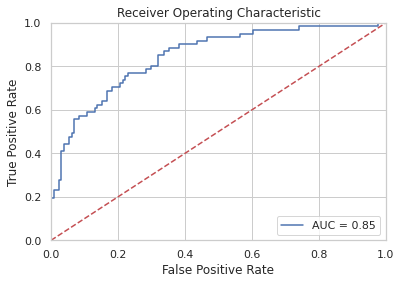

In [38]:
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


In [39]:
# feature reduction using Principal Component Analysis (PCA) for visualizaing into 2D
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X_test)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])

In [40]:
print(principalDf)

     principal component 1  principal component 2
0                -3.118326               0.799314
1                 0.462002               3.025344
2                -1.203091               0.794665
3                 2.066855               0.622613
4                 0.458762              -0.826460
..                     ...                    ...
187               1.927647              -0.916590
188              -0.559872              -0.550762
189               1.014026              -0.824170
190              -0.611806              -0.028120
191               0.435388               1.916982

[192 rows x 2 columns]


In [42]:
# adding class attribute
principalDf['class']= y_pred

In [43]:
principalDf

,principal component 1,principal component 2,class
0,-3.118326,0.799314,1
1,0.462002,3.025344,0
2,-1.203091,0.794665,1
3,2.066855,0.622613,0
4,0.458762,-0.826460,0
...,...,...,...
187,1.927647,-0.916590,0
188,-0.559872,-0.550762,0
189,1.014026,-0.824170,0
190,-0.611806,-0.028120,0


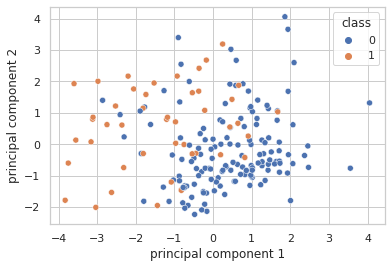

In [44]:
# seaborn lib import

import seaborn as sns
sns.set_theme(style="whitegrid")


cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)
g = sns.scatterplot(
    data=principalDf,
    x="principal component 1", y="principal component 2",
    hue="class",
     sizes=(100, 200),
)